In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
# Python 3 program to calculate Distance Between Two Points on Earth
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
	
	# The math module contains a function named
	# radians which converts from degrees to radians.
	lon1 = radians(lon1)
	lon2 = radians(lon2)
	lat1 = radians(lat1)
	lat2 = radians(lat2)
	
	# Haversine formula
	dlon = lon2 - lon1
	dlat = lat2 - lat1
	a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

	c = 2 * asin(sqrt(a))
	
	# Radius of earth in kilometers. Use 3956 for miles
	r = 6371
	
	# calculate the result
	return(c * r)
	
	
def getDistance(A,B):
    return distance(A["latitude"],B["latitude"],A["longitude"],B["longitude"])


In [ ]:
url = "https://drive.google.com/u/0/uc?id=19ty8nTlvBfzexG2J3qZQYXlbKFPGIYBk&export=download&confirm=t&uuid=f90aed2b-688d-4fa2-be31-316fbf3ee936"

In [ ]:
taxis = pd.read_csv(url,names=["taxiId","datetime","longitude","latitude"],index_col="datetime")
print(taxis.head())
taxis.index = pd.to_datetime(taxis.index)

                     taxiId  longitude  latitude
datetime                                        
2008-02-02 15:36:08       1  116.51172  39.92123
2008-02-02 15:46:08       1  116.51135  39.93883
2008-02-02 15:46:08       1  116.51135  39.93883
2008-02-02 15:56:08       1  116.51627  39.91034
2008-02-02 16:06:08       1  116.47186  39.91248


In [ ]:
beijing = {"lat":40.190632, "lon":116.412144,"radius":sqrt(16411/(np.pi*2))}

In [ ]:
def getDayMoment(dates):
    moments = {
        0:"afterMidnight",1:"morning",2:"afternoon",3:"night"
    }
    #each moment of the day is a period of 6 hours
    res = []
    for i in range(len(dates)):
        res.append(moments[int(dates[i].hour/6)])
    return res
def getDayOfWeek(dates):
    days = "Mon Tue Wed Thu Fri Sat Sun".split(" ")
    res = []
    for i in range(len(dates)):
        res.append(days[dates[i].weekday()])
    return res

def getHours(dates):
    res = []
    for i in range(len(dates)):
        res.append(dates[i].hour)
    return res

In [ ]:
taxis["dayMoment"] = getDayMoment(taxis.index)

In [ ]:
taxis["hours"] = getHours(taxis.index)

In [ ]:
taxis["days"] = getDayOfWeek(taxis.index)

In [ ]:
taxis["longitude"].mean(),taxis["longitude"].min(),taxis["longitude"].max()

(116.18014319415296, 0.0, 255.3)

In [ ]:
taxis["latitude"].mean(),taxis["latitude"].min(),taxis["latitude"].max()

(39.84973016183504, 0.0, 96.06767)

<BarContainer object of 24 artists>

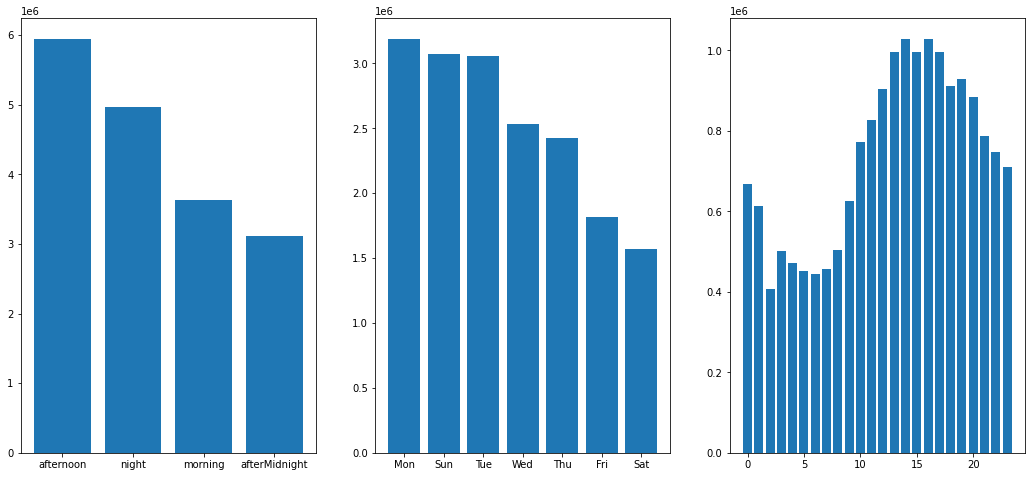

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
bar = taxis["dayMoment"].value_counts()
plt.bar(bar.index, bar)

plt.subplot(1,3,2)
bar = taxis["days"].value_counts()
plt.bar(bar.index, bar)

plt.subplot(1,3,3)
bar = taxis["hours"].value_counts()
plt.bar(bar.index, bar)

In [ ]:
t1 = taxis[taxis["taxiId"]==1]

In [ ]:
diff1 = (t1.index[1:]-t1.index[:-1])

In [ ]:
taxis["taxiId"].min(),taxis["taxiId"].max()

(1, 10357)

In [ ]:
def getDiffs(data,minId=1,maxId=10357):
    times,distances = [],[]
    for i in range(minId,maxId+1):
        print(i)
        taxisTimeDiff, taxiDistance= [None],[None]
        taxiData = data[data["taxiId"]==i]
        for t in range(len(taxiData)-1):
            taxisTimeDiff.append((taxiData.index[t+1].timestamp()-taxiData.index[t].timestamp())/60)
            taxiDistance.append(getDistance(taxiData.iloc[t],taxiData.iloc[t+1]))
        times.append(taxisTimeDiff)
        distances.append(taxiDistance)
    return times, distances
def modif(times, distanes, data):
  resT,resD = [],[]
  for i in range(len(data)):
      taxid = data.iloc[i]
      resT.append(times[taxid-1].pop(0))
      resD.append(distances[taxid-1].pop(0))
  return resT,resD

In [ ]:
res = getDiffs(taxis)

In [ ]:
""" from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/taxis.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  taxis.to_csv(f) """

" from google.colab import drive\n\ndrive.mount('/content/drive')\npath = '/content/drive/My Drive/taxis.csv'\n\nwith open(path, 'w', encoding = 'utf-8-sig') as f:\n  taxis.to_csv(f) "